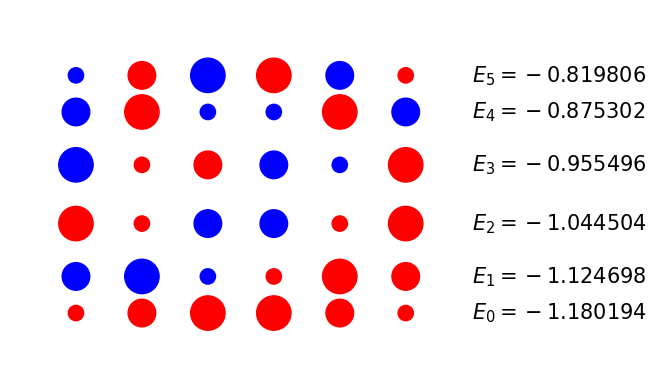

In [177]:
import numpy as np
import matplotlib.pyplot as plt

def buildMatrix(nSites,alpha,beta,isLoop):
    hamiltonian = np.zeros((nSites,nSites))
    for i in range(nSites-1):
        hamiltonian[i][i] = alpha
        hamiltonian[i][i+1] = beta
        hamiltonian[i+1][i]=beta
    hamiltonian[nSites-1][nSites-1] = alpha
    if(isLoop):
        hamiltonian[0][nSites-1] = beta
        hamiltonian[nSites-1][0] = beta
    return(hamiltonian)        

nSites = 6
alpha = -1.0
beta = -0.1
isLoop = False

hamiltonian = buildMatrix(nSites,alpha,beta,isLoop)

E,V = np.linalg.eig(hamiltonian)
idx = E.argsort()[::1]   
E = E[idx]
V = V[:,idx]

figure, ax = plt.subplots()
ax.axis('off')

circle = np.empty((nSites,nSites))
maxdegen = 0
for i in range(nSites):
    if(i>0 and E[i]-E[i-1] < 1e-10):
        degen = degen + 1
        if (degen > maxdegen): maxdegen = degen
    else:
        degen = 0
    for j in range(nSites):
        if(V[j][i]<0):
            color = 'r'
        else:
            color = 'b'
        circle = plt.Circle((0.0+j+nSites*degen,E[i]*10), 0.5*np.abs(V[j][i]), color=color )
        ax.add_artist(circle)
    plt.text(nSites+nSites*degen, E[i]*10, f'$E_{i}={E[i]:.6f}$', fontsize = 15, horizontalalignment='left', verticalalignment='center')


ax.set_aspect(1)
ax.set(xlim=[-1.0, nSites+nSites*maxdegen], ylim=[np.min(E)*10-1.0, np.max(E)*10+1.0], xlabel='x', ylabel='Energy (a.u.)')
plt.show()